In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import math
import pandas as pd
import copy
from dataclasses import dataclass
from functools import reduce
import time
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

<ipython-input-1-85737423fff3>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [2]:
@dataclass
class Node:
    p: int = 0
    v: int = 0

In [3]:
class Net:

    def __init__(self, martx, nodes) -> None:
        self.nodes = nodes # machines
        self.graph = nx.Graph(np.array(martx))
        self.number = len(self.nodes)

    def __str__(self):
        return f'''nodes : {self.nodes},\n Распределение: {self.number}'''

    def print(self):
        pos = nx.spring_layout(self.graph, seed=100)
        nx.draw(self.graph, pos, with_labels=True, font_color='white')
        nx.draw_networkx_edge_labels(self.graph, pos, {(x, y): z['weight'] for (x, y, z) in nx.to_edgelist(self.graph)},font_color='red')

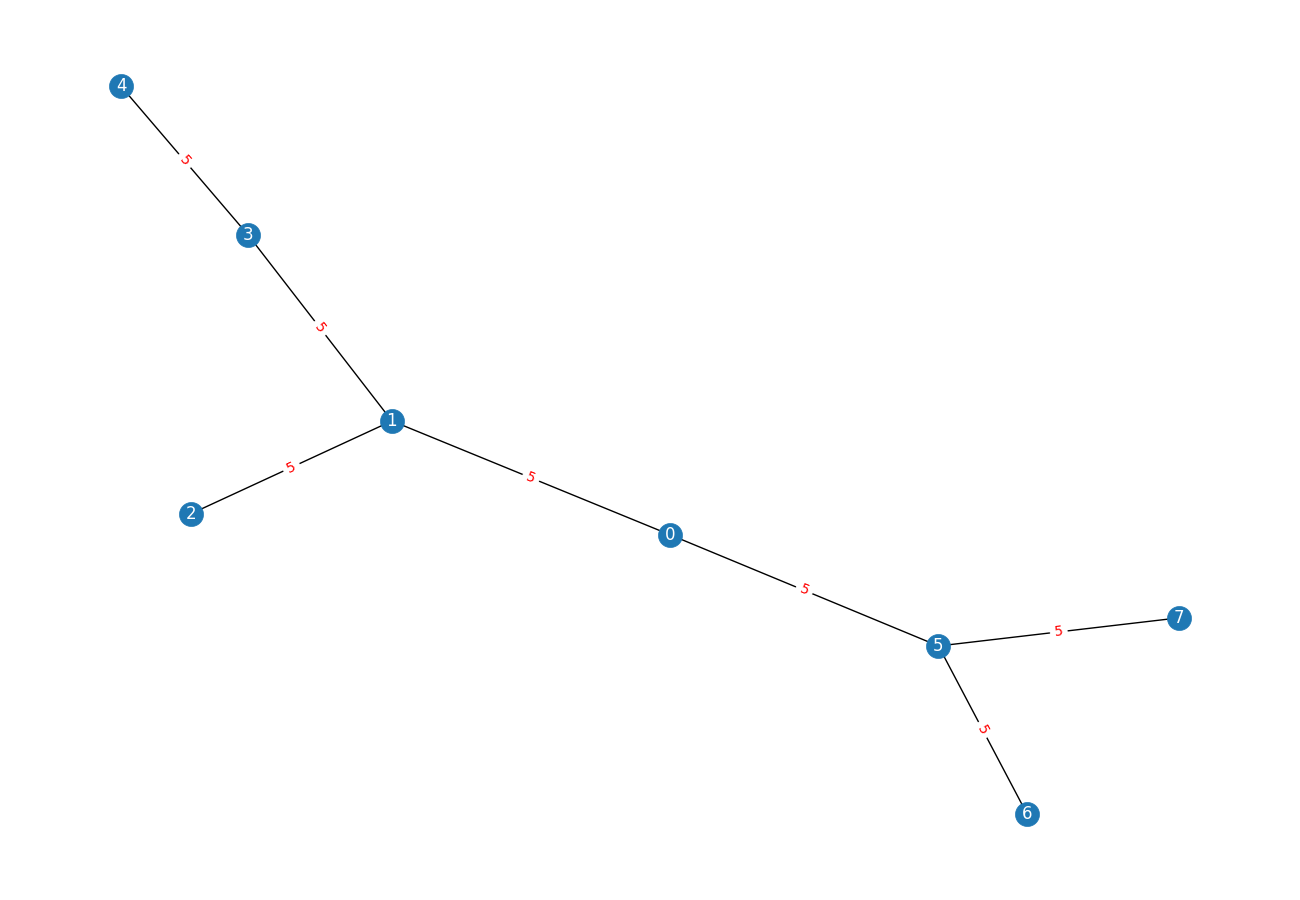

In [4]:
martx = [
        [0, 5, 0, 0, 0, 5, 0, 0],
        [5, 0, 5, 5, 0, 0, 0, 0],
        [0, 5, 0, 0, 0, 0, 0, 0],
        [0, 5, 0, 0, 5, 0, 0, 0],
        [0, 0, 0, 5, 0, 0, 0, 0],
        [5, 0, 0, 0, 0, 0, 5, 5],
        [0, 0, 0, 0, 0, 5, 0, 0],
        [0, 0, 0, 0, 0, 5, 0, 0]]


RANDOM_SEED = 1
random.seed(RANDOM_SEED)

# net_power = [random.randint(500, 2500) for _ in range(len(martx[0]))]

nodes = [Node(1500, 20) for _ in range(len(martx[0]))]

net = Net(martx, nodes)
net.print()

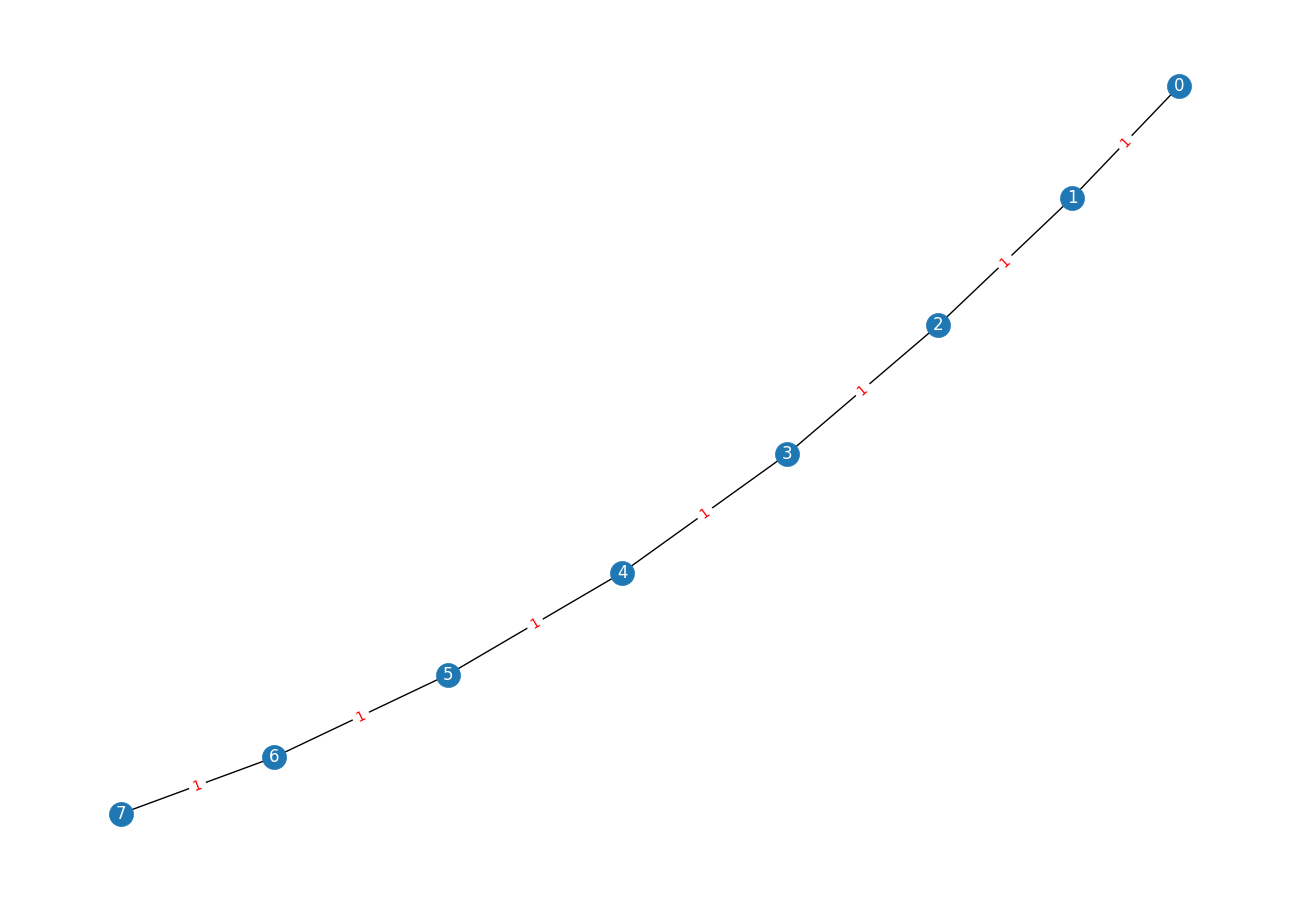

In [5]:
martx = [
[0, 1, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 1, 0],]



RANDOM_SEED = 1
random.seed(RANDOM_SEED)

# net_power = [random.randint(500, 2500) for _ in range(len(martx[0]))]

nodes = [Node(1500, 20) for _ in range(len(martx[0]))]

net = Net(martx, nodes)
net.print()

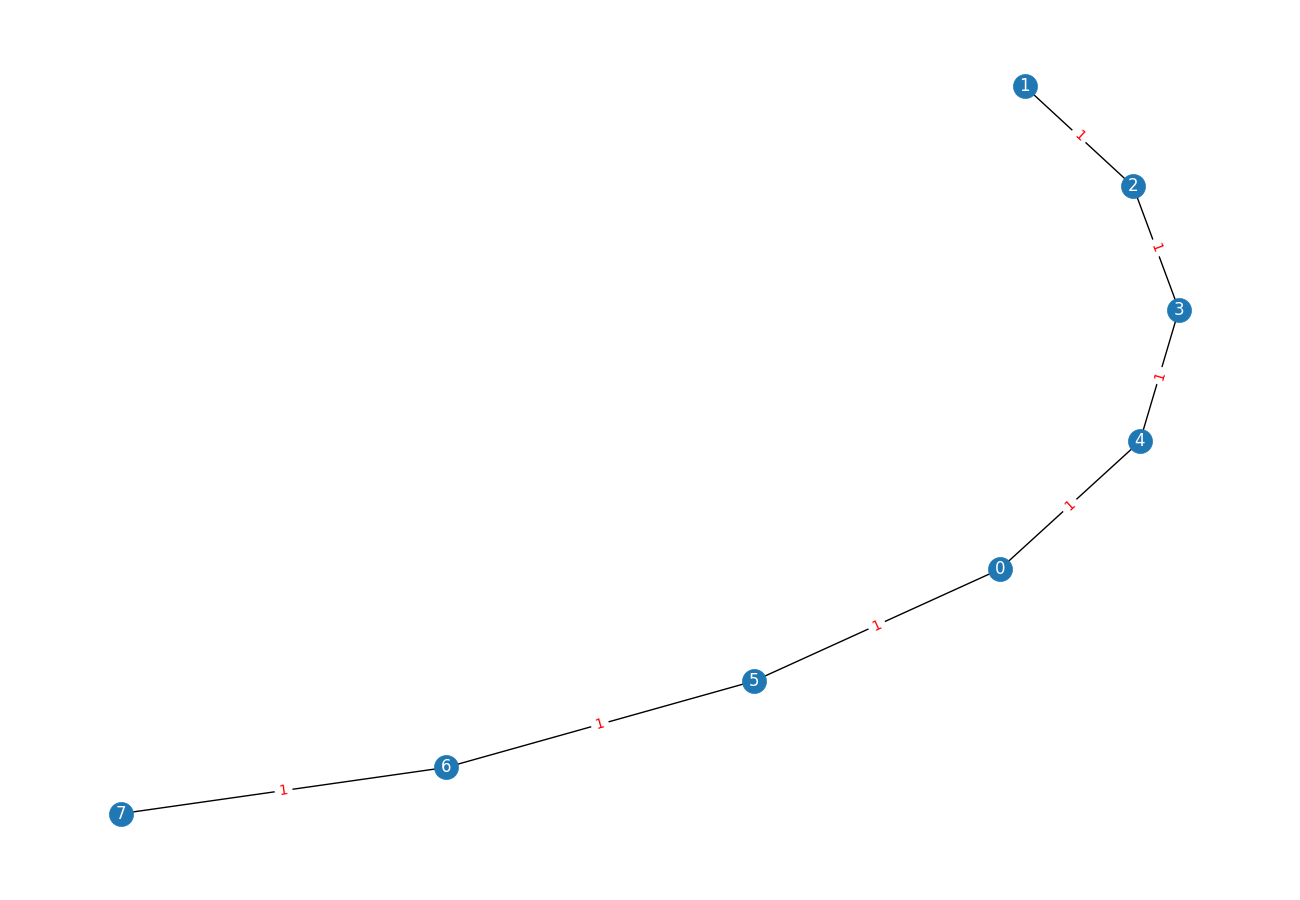

In [6]:
martx = [
[0, 0, 0, 0, 1, 1, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0],
[1, 0, 0, 1, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 1, 0],]


RANDOM_SEED = 1
random.seed(RANDOM_SEED)

# net_power = [random.randint(500, 2500) for _ in range(len(martx[0]))]

nodes = [Node(1500, 20) for _ in range(len(martx[0]))]

net = Net(martx, nodes)
net.print()

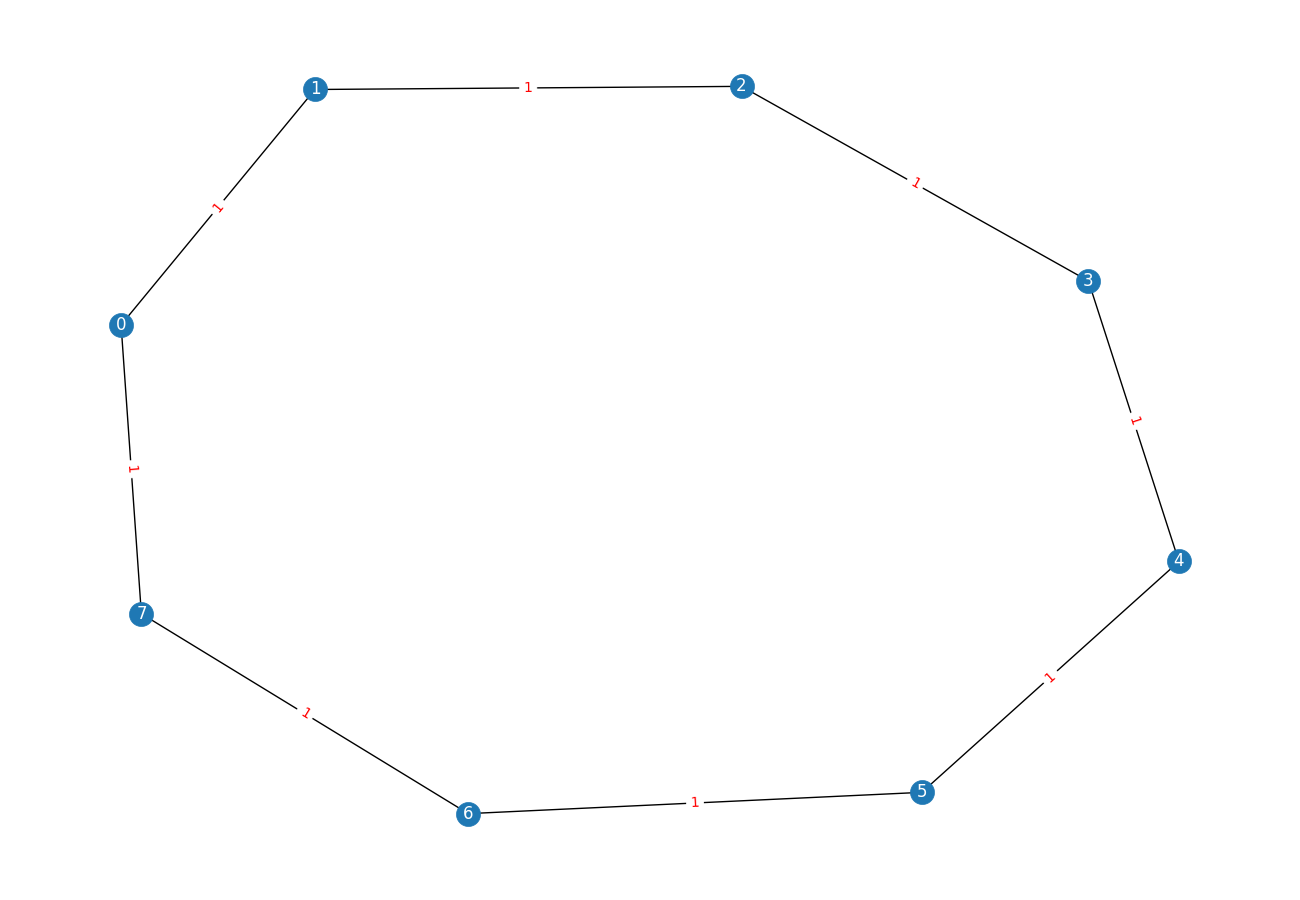

In [7]:
martx = [
[0, 1, 0, 0, 0, 0, 0, 1],
[1, 0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 1, 0, 1],
[1, 0, 0, 0, 0, 0, 1, 0],]



RANDOM_SEED = 1
random.seed(RANDOM_SEED)

# net_power = [random.randint(500, 2500) for _ in range(len(martx[0]))]

nodes = [Node(1500, 20) for _ in range(len(martx[0]))]

net = Net(martx, nodes)
net.print()

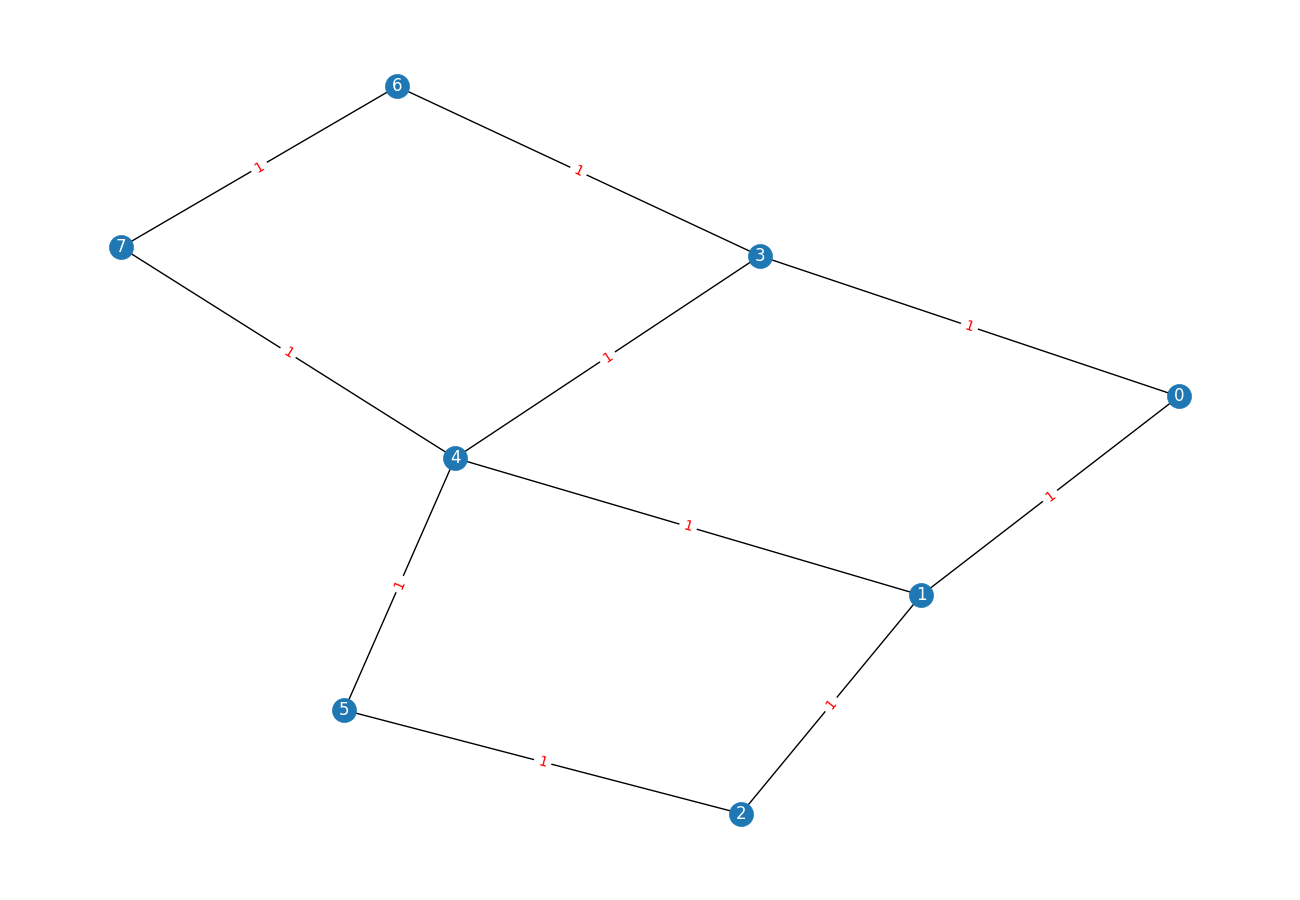

In [8]:
martx = [
[0, 1, 0, 1, 0, 0, 0, 0],
[1, 0, 1, 0, 1, 0, 0, 0],
[0, 1, 0, 0, 0, 1, 0, 0],
[1, 0, 0, 0, 1, 0, 1, 0],
[0, 1, 0, 1, 0, 1, 0, 1],
[0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 1],
[0, 0, 0, 0, 1, 0, 1, 0],]



RANDOM_SEED = 1
random.seed(RANDOM_SEED)

# net_power = [random.randint(500, 2500) for _ in range(len(martx[0]))]

nodes = [Node(1500, 20) for _ in range(len(martx[0]))]

net = Net(martx, nodes)
net.print()

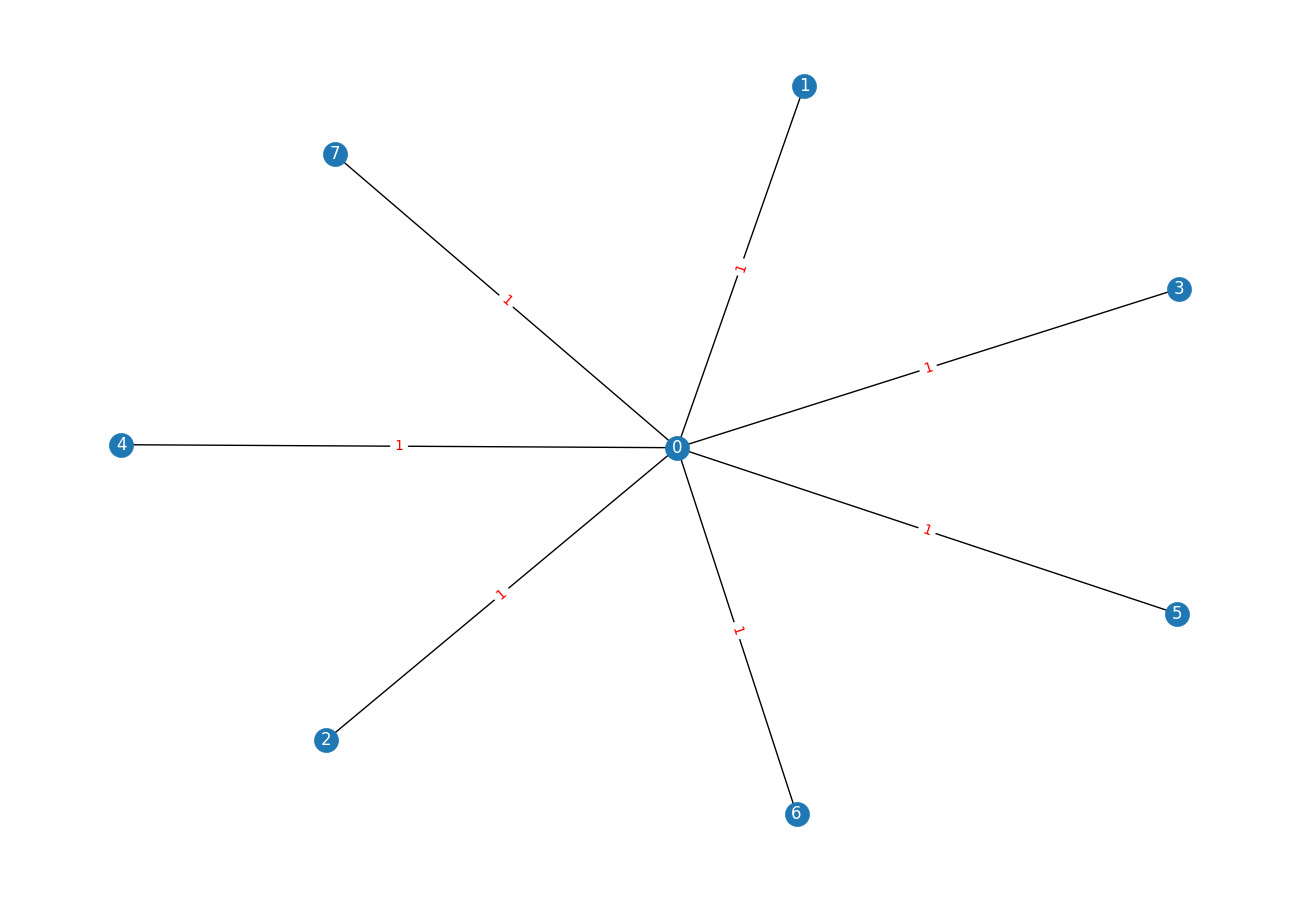

In [9]:
martx = [
[0, 1, 1, 1, 1, 1, 1, 1],
[1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0, 0],]




RANDOM_SEED = 1
random.seed(RANDOM_SEED)

# net_power = [random.randint(500, 2500) for _ in range(len(martx[0]))]

nodes = [Node(1500, 20) for _ in range(len(martx[0]))]

net = Net(martx, nodes)
net.print()

In [10]:
@dataclass
class Operation:
    w: int = 0
    v: int = 0

In [11]:
class Task:
    def __init__(self, martx, operations) -> None:
        self.operations = operations
        self.graph = nx.DiGraph(np.array(martx))
        self.number = len(self.operations)

    def __str__(self):
        return f'''operations : {self.operations},\n Распределение: {self.number}'''

    def print(self):
        options = {
            'width': 1,
            'arrowstyle': '-|>',
            'arrowsize': 18,
        }

        pos = nx.spring_layout(self.graph, seed=100)
        nx.draw(self.graph, pos, with_labels=True, font_color='white', **options)
        nx.draw_networkx_edge_labels(self.graph, pos, {(x, y): z['weight'] for (x, y, z) in nx.to_edgelist(self.graph)},font_color='red')

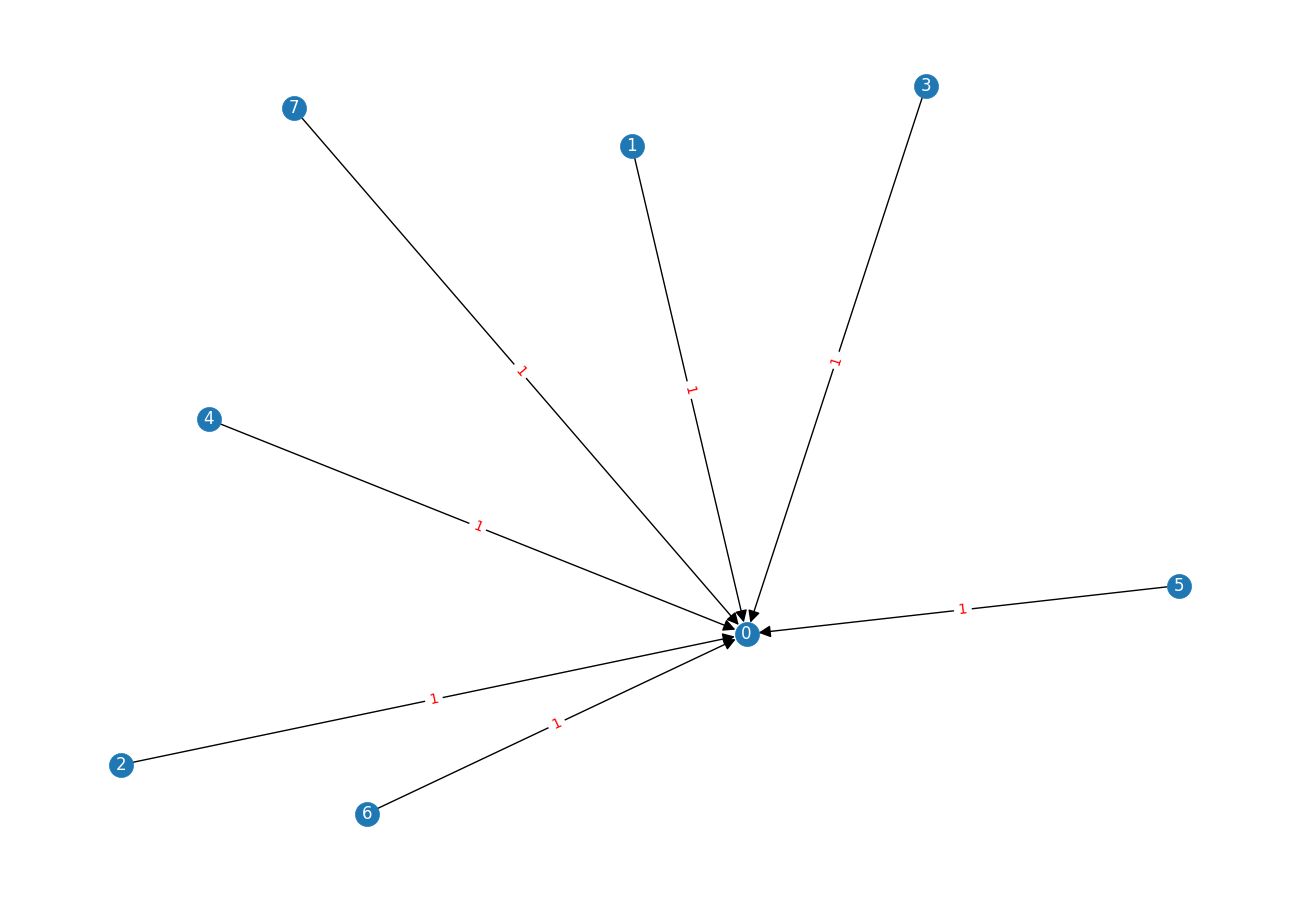

In [12]:
martx = [
    [0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],]

RANDOM_SEED = 1
random.seed(RANDOM_SEED)

for i in range(len(martx)):
    for j in range(len(martx)):
        if martx[i][j] == 5 : martx[i][j] = random.randint(100, 1000)


task_weight = [500,1000,1500,2000,2500,3000,3500]
task_data_transmission = [3500, 3000, 2000, 1000, 500, 300, 100]

type_task = [Operation(w,dt) for w,dt in zip(task_weight, task_data_transmission)]
operations = [Operation(500, 4096) for _ in range(len(martx[0]))]

task = Task(martx, operations)
task.print()

In [13]:
def f1(solution, parameters):
    return solution.T

def f2(solution, parameters):
    t_node = getattr(solution, 't_node')
    t_send_reseive_data_node = getattr(solution, 't_send_reseive_data_node')
    T = getattr(solution, 'T')

    E = [0 for _ in range(solution._NET.number)]
    for i in range(solution._NET.number):
        # Енергопотрбление = энергопотребление выч. устройства + энергопотребление принятия и отправки данных
        E[i] = 5 *t_node[i] + (T - t_node[i])* 3 + 50000000 * t_send_reseive_data_node[i] + (T - t_send_reseive_data_node[i])* 5000000
    return sum(E) / 1000000

def f3(solution, parameters):
    return sum(solution.v_edges_net.values())

def f4(solution, inedxMashin, parameters):
    res =  getattr(solution, 'W')[inedxMashin]
    return res

def f5(solution, inedxMashin, parameters):
    v_sent_to_node = getattr(solution, 'v_sent_to_node')
    v_reseive_to_node = getattr(solution, 'v_reseive_to_node')
    return v_sent_to_node[inedxMashin] + 1


In [14]:
CRITERIA = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Временя выполнение задачи (с)' :[f1, 'min', {'index_node':[i for i in range(net.number)],}],
        'Энергопотребление (МВт)' : [f2, 'min', {'index_node':[i for i in range(net.number)]}],
        # 'Объемы передаваемой информации' : [f3, 'min', {'index_node':[i for i in range(net.number)]}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
        #'Нагрузка':{
        #    'index_node': [i for i in range(net.number)],
        #    'f': [f4, 'min', {}]
        #},
        #'Объемы передаваемой информации': {
        #    'index_node': [i for i in range(net.number)],
        #    'f':[f5, 'min', {}]
        #},
    }
}
LIMITATIONS = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Ограничение по времени' :[f1, {'index_node':[i for i in range(net.number)], 'T_lim': 77}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
    }

}

In [15]:
class Solution:
    _NET = net
    _TASK = task
    _CRITERIA = CRITERIA
    _LIMITATIONS = LIMITATIONS

    _CHROMOSOME_MIN = 0
    _CHROMOSOME_MAX = 6
    _CHROMOSOME_LENGTH = net.number

    def __str__(self):
        return f'''Cвертка: {getattr(self, 'Свертка')},\nВременя выполнение задачи (с): {getattr(self, 'T')},\nХромосома: {self.chromosome}\nРаспределение: {self.distribution},\nМаршруты передачи данных  задача1задача2:путь: {self.paths}\nНагруженность на узлы: {getattr(self, 'W')}\nНагрузка на сеть: {getattr(self, 'v_edges_net')}\nv_reseive_to_node: {getattr(self, 'v_reseive_to_node')}\nv_sent_to_node: {getattr(self, 'v_sent_to_node')}\nt_node: {getattr(self, 't_node')}\nt_send_reseive_data_node: {getattr(self, 't_send_reseive_data_node')}\nt_edges: {getattr(self, 't_edges')}\n{self.__paramets_to_str()}\n'''

    def __paramets_to_str(self):
        res = '\nЦелевые функции (критерии оценки)\n'
        for k, v in self._CRITERIA['all/group'].items():
            res += k + ' / ' + v[1] + ':' + str(getattr(self, k)) + '\n'
        for k, v in self._CRITERIA['mashin'].items():
           for index_m in v['index_node']:
                res += k + ' m' + str(index_m) + ' / ' + v['f'][1] + ':' + str(getattr(self, k + ' m' + str(index_m))) + '\n'
        res += 'Ограничения\n'
        res += str(getattr(self, 'Выполнение условий')) + '\n'
        for k, v in self._LIMITATIONS['all/group'].items():
            res += k + ' / ' + ':' + str(getattr(self, k)) + '\n'
        for k, v in self._LIMITATIONS['mashin'].items():
           for index_m in v['index_node']:
                res += k + ' m' + str(index_m) + ' / ' + ':' + str(getattr(self, k + ' m' + str(index_m))) + '\n'
        return res

    def __eq__(self, other):
        return np.array_equal(self.chromosome, other.chromosome)

    def __init__(self, chromosome = None):
        self.set_distribution([i for i in range(self._TASK.number)])
        if chromosome is None:
            self.set_random_chromosome()
        else:
            self.set_chromosome(chromosome)

        self.velocity = np.random.uniform(-1, 1, self._TASK.number)
        self.best_position = copy.deepcopy(self)
        self.best_score = float('inf')

    def update_velocity(self, global_best_position, omega, phi_p, phi_g):
        rp, rg = np.random.random(), np.random.random()
        self.velocity = (omega * self.velocity +
                         phi_p * rp * (self.best_position.distribution - self.distribution) +
                         phi_g * rg * (global_best_position.distribution - self.distribution))

    def update_chromosome(self):
        chromosome = np.clip(np.round(self.distribution + self.velocity), self._CHROMOSOME_MIN, self._CHROMOSOME_MAX).astype(int)
        self.set_chromosome(chromosome)

    def set_random_chromosome(self, CONST_DISTRIBUTION={}):
        self.set_chromosome(np.random.randint(self._CHROMOSOME_MIN, self._CHROMOSOME_MAX, size=self._CHROMOSOME_LENGTH))

    def set_chromosome(self, chromosome):
        self.chromosome = np.clip(chromosome, self._CHROMOSOME_MIN, self._CHROMOSOME_MAX).astype(int)
        self.network_status_calculation()
        self.calculation_limitations()
        self.calculation_objective_function()

    def set_random_distribution(self, CONST_DISTRIBUTION={}):
        self.set_distribution(np.random.randint(0, self._NET.number, size=self._TASK.number))

    def set_distribution(self, distr):
        self.distribution = distr
        self.create_paths()

    def mutation(self, indpb=0.01):
        chromosome = self.chromosome.copy()
        for task in range(self._TASK.number):
            if random.random() <= indpb:
                chromosome[task] = random.randint(self._CHROMOSOME_MIN, self._CHROMOSOME_MAX)
        self.set_chromosome(chromosome)

    def create_paths(self, indpb=0.01):
        # 'Операция1Операция2:ПутьВГрафеСети'
        self.paths = {}
        for start, end, _ in nx.to_edgelist(Solution._TASK.graph):
            if self.distribution[start] == self.distribution[end]:
                self.paths[str(start) + str(end)] = [self.distribution[start]]
            else:
                self.paths[str(start) + str(end)] = random.choice([item for item in nx.all_shortest_paths(Solution._NET.graph, self.distribution[start], self.distribution[end])])

    def calculation_objective_function(self):
        # Считаем все критрии вида all/group для объекта
        convolution = 1
        for k, v in self._CRITERIA['all/group'].items():
            setattr(self, k, v[0](self, v[2]))

            if v[1] == "max":
                convolution *= v[0](self, v[2])
            else:
                convolution *= 1/v[0](self, v[2]) if v[0](self, v[2])>0 else 0

        # Считаем все критрии для объекта
        for k, v in self._CRITERIA['mashin'].items():
            for index_m in v['index_node']:
                setattr(self, k + ' m' + str(index_m), v['f'][0](self, index_m, v['f'][2]))
                if v['f'][1] == "max":
                    convolution *=   v['f'][0](self, index_m, v['f'][2])
                else:
                    convolution *= 1/v['f'][0](self, index_m, v['f'][2]) if v['f'][0](self, index_m, v['f'][2])>0 else 0

        setattr(self, 'Свертка', convolution if getattr(self, 'Выполнение условий') > 0 else -1)

    def calculation_limitations(self):
        # Считаем все ограничения вида all/group для объекта
        convolution = 1
        for k, v in self._LIMITATIONS['all/group'].items():
            value = v[0](self, v[1])
            setattr(self, k, value)
            convolution *= value

        # Считаем все ограничения для объекта
        for k, v in self._LIMITATIONS['mashin'].items():
            for index_m in v['index_node']:
                value = v['f'][0](self, index_m, v['f'][1])
                setattr(self, k + ' m' + str(index_m), value)
                convolution *=  value

        setattr(self, 'Выполнение условий', convolution)

    def draw_result(self):

        v_edges_net = getattr(self, 'v_edges_net')
        t_node = getattr(self, 't_node')
        t_send_reseive_data_node = getattr(self,'t_send_reseive_data_node')
        t_edges = getattr(self, 't_edges')

        pos = nx.spring_layout(self._NET.graph, seed=100)
        nx.draw(self._NET.graph, pos, with_labels=True, font_color='white')
        nx.draw_networkx_edge_labels(self._NET.graph, {key:[value[0], value[1]] for key, value in pos.items()}, {(int(key[0]), int(key[1])): value for (key, value) in v_edges_net.items()}, font_color='red')
        nx.draw_networkx_edge_labels(self._NET.graph, {key:[value[0], value[1] + 0.1] for key, value in pos.items()}, {(int(key[0]), int(key[1])): str(round(t_edges[i], 3)) + ' c.' for i, (key, value) in enumerate(v_edges_net.items())}, font_color='red')

        pos_labels = {key:[value[0], value[1] + 0.05] for key, value in pos.items()}
        labels = {node: f't_node:{round(t_node[node],3)} с.' for node in self._NET.graph.nodes()}
        nx.draw_networkx_labels(self._NET.graph, pos_labels, labels, font_size= 8, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))

        pos_labels = {key:[value[0], value[1] + 0.1] for key, value in pos.items()}
        labels = {node: f' t_send/reseive:{round(t_send_reseive_data_node[node],3)} с.' for node in self._NET.graph.nodes()}
        nx.draw_networkx_labels(self._NET.graph, pos_labels, labels, font_size= 8, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))

        plt.show()

    def network_status_calculation(self):
      # Подсчет трудоемкости на каждом узле
      self.W = [0 for _ in range(self._NET.number)]
      # Сколько каждый узел должен обработать операций
      self.W_task_to_node = [0 for _ in range(self._NET.number)]
      # Сколько каждый узел должен отправить
      self.v_sent_to_node = [0 for _ in range(self._NET.number)]
      # Сколько каждый узел должен принять
      self.v_reseive_to_node = [0 for _ in range(self._NET.number)]
      # Нагрузка ребер
      self.v_edges_net = {str(x[0])+str(x[1]):0 for x in nx.to_edgelist(self._NET.graph)}

      for start, end, weight in nx.to_edgelist(self._TASK.graph):
          """
          start - задача начало
          end - задача конец
          weight - то сколько должено быть прередано из одной задачи в другую
          """
          if not len(self.paths[str(start) + str(end)]) == 1:
              path_start_end = self.paths[str(start) + str(end)].copy()
              
              for index_node_net in range(1, len(path_start_end)):
                str1 = str(path_start_end[index_node_net]) + str(path_start_end[index_node_net-1])
                str2 = str(path_start_end[index_node_net-1]) + str(path_start_end[index_node_net])

                self.v_edges_net[str1 if str1 in list(self.v_edges_net.keys()) else str2] += type_task[self.chromosome[start]].v
              # task_weight - нагрузка на выполнение задачи
              #Оброботка нагрузки начала пути

              self.W[path_start_end[0]] += type_task[self.chromosome[start]].w
              self.v_sent_to_node[path_start_end[0]] += type_task[self.chromosome[start]].v

              #Оброботка нагрузки конца пути
              self.v_reseive_to_node[path_start_end[-1]] += type_task[self.chromosome[end]].v

              path_start_end.pop(0)
              path_start_end.pop(-1)

              # Оброботка нагрузки всех остальных узлов в пути
              for node_net in path_start_end:
                  self.v_sent_to_node[node_net] += type_task[self.chromosome[node_net]].v
                  self.v_reseive_to_node[node_net] += type_task[self.chromosome[node_net]].v
          else:
              self.W[self.distribution[start]] += type_task[self.chromosome[self.distribution[start]]].w
      self.W[0] = 10
      self.t_node = [self.W[i]/self._NET.nodes[i].p for i in range(len(self.W))]
      self.t_send_reseive_data_node = [(self.v_sent_to_node[i] + self.v_reseive_to_node[i])/self._NET.nodes[i].v for i in range(len(self.W))]
      self.t_edges = [v/min(self._NET.nodes[i].v for i in range(len(self.W))) for v in self.v_edges_net.values()]
      self.T = sum(self.t_node) + sum(self.t_send_reseive_data_node) + sum(self.t_edges)




In [16]:
Solution._NET = net
Solution._TASK = task
Solution._CRITERIA = CRITERIA
Solution._LIMITATIONS = LIMITATIONS

In [17]:
class GA:
    def __init__(self, POPULATION_SIZE = 300, P_CROSSOVER = 0.9, P_MUTATION = 0.1, MAX_GENERATIONS = 300) -> None:
        # константы генетического алгоритма
        self.POPULATION_SIZE = POPULATION_SIZE   # количество индивидуумов в популяции
        self.P_CROSSOVER = P_CROSSOVER       # вероятность скрещивания
        self.P_MUTATION = P_MUTATION        # вероятность мутации индивидуума
        self.MAX_GENERATIONS = MAX_GENERATIONS    # максимальное количество поколений
        self.HISTORY = []
        self.global_best_position = Solution()

    @staticmethod
    def populationCreator(n = 0):
        return list([Solution() for _ in range(n)])

    def crossing(self, p1,p2):
        #Скрещивание распределения
        chromosome1, chromosome2 = p1.chromosome.copy(), p2.chromosome.copy()
        s = random.randint(2, len(chromosome1)-3)
        chromosome1[s:], chromosome2[s:] = chromosome2[s:], chromosome1[s:]
        p1.set_chromosome(chromosome1)
        p2.set_chromosome(chromosome2)

    def selTournament(self, population):
        offspring = []
        for n in range(self.POPULATION_SIZE):
            i1 = i2 = i3 = 0
            while i1 == i2 or i1 == i3 or i2 == i3:
                i1, i2, i3 = random.randint(0, self.POPULATION_SIZE-1), random.randint(0, self.POPULATION_SIZE-1), random.randint(0, self.POPULATION_SIZE-1)
            offspring.append(max([population[i1], population[i2], population[i3]], key=lambda ind: getattr(ind,'Свертка')))
        return offspring

    def clone(self, x):
        ind = Solution(x.chromosome)
        return ind

    def optimize(self):
        self.population = self.populationCreator(n=self.POPULATION_SIZE)
        generationCounter = 0
        start_time = time.time()
        f_calls = self.POPULATION_SIZE
        self.HISTORY.append([f_calls, time.time() - start_time, copy.deepcopy(self.population), self.global_best_position])
        while generationCounter < self.MAX_GENERATIONS:
            generationCounter += 1
            offspring = self.selTournament(self.population)
            offspring = list(map(self.clone, offspring))

            # Скрещивание
            for child1, child2 in zip(offspring[::2], offspring[1::2]):
                if random.random() < self.P_CROSSOVER:
                    self.crossing(child1, child2)
                    f_calls += 2

            # Мутация
            for mutant in offspring:
                if random.random() < self.P_MUTATION:
                    mutant.mutation(indpb=1.0/(Solution._TASK.number))
                    f_calls += 1

            self.population[:] = offspring

            y = max(self.population, key= lambda x: getattr(x,'Свертка'))
            if getattr(y,'Свертка') > getattr(self.global_best_position,'Свертка'):
                self.global_best_position = copy.deepcopy(y)
            self.HISTORY.append([f_calls, time.time() - start_time, copy.deepcopy(self.population), self.global_best_position])

    def print_res(self):
        print(max(self.population, key=lambda ind: getattr(ind,'Свертка')))

    def print_population(self, c1, c2, num_pop = -1):
        plt.scatter([getattr(x,c1) for x in self.population],[getattr(y, c2)for y in self.population], label='Все точки')
        plt.xlabel(c1)
        plt.ylabel(c2)
        plt.title('Множество Парето')
        plt.legend()
        plt.show()

    def dominates(self, m1, m2, c1, c2):
        return getattr(m1, c1) <= getattr(m2, c1) and getattr(m1, c2) <= getattr(m2, c2) and (getattr(m1, c1) < getattr(m2, c1) or getattr(m1, c2) < getattr(m2, c2))

    def print_fron_rang_1(self, c1, c2):
        set_pop = []
        for i in range(len(self.population)):
            flag = True
            for j in range(i + 1, len(self.population)):
                if self.population[i] == self.population[j]:
                    flag = False
            flag2= True
            for j in range(len(set_pop)):
                if self.population[i] == set_pop[j]:
                    flag = False
            if flag2 and flag and getattr(self.population[i],'Свертка')>0:
                set_pop.append(self.population[i])

        population_ = [x for x in set_pop if getattr(x,'Свертка') > 0]
        rank = [0 for _ in range(len(population_))]
        for i in range(len(population_)):
            for j in range(i+1, len(population_)):
                if self.dominates(population_[i], population_[j], c1, c2):
                    rank[j] += 1
                elif self.dominates(population_[j], population_[i], c1, c2):
                    rank[i] += 1

        F_rank = [[] for _ in range(max(rank)+1)]
        for r, ind in sorted(zip(rank, population_), key=lambda x: x[0]):
            F_rank[r].append(ind)

        for ind in F_rank[0]:
            print(ind)

        F_all = []
        for r in range(1,len(F_rank)):
            F_all += F_rank[r]
        plt.scatter([getattr(x,c1) for x in F_all],[getattr(y, c2)for y in F_all], label='Все точки')
        plt.scatter([getattr(x,c1) for x in F_rank[min(rank)]],[getattr(x, c2) for x in F_rank[min(rank)]], color='red', label='Множество Парето')
        plt.xlabel(c1)
        plt.ylabel(c2)
        plt.title('Множество Парето')
        plt.legend()
        plt.show()

In [18]:
experements = []
arr_algo = []

for i in range(10):
    RANDOM_SEED = i
    random.seed(RANDOM_SEED)
    np.random.seed(RANDOM_SEED)
    algo = GA(100, 0.9, 0.1, 100)
    algo.optimize()
    arr_algo.append(algo)
    experements.append(algo.HISTORY)
    algo.print_res()
    print()

Cвертка: 0.0001249437293293903,
Временя выполнение задачи (с): 121.34,
Хромосома: [6 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 0], '30': [3, 0], '40': [4, 0], '50': [5, 0], '60': [6, 0], '70': [7, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 100, '02': 100, '03': 100, '04': 100, '05': 100, '06': 100, '07': 100}
v_reseive_to_node: [700, 0, 0, 0, 0, 0, 0, 0]
v_sent_to_node: [0, 100, 100, 100, 100, 100, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
t_edges: [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:8003.6029448399995
Ограничения
1



Cвертка: 0.0001249437293293903,
Временя выполнение задачи (с)

<ipython-input-19-3d584a83d833>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


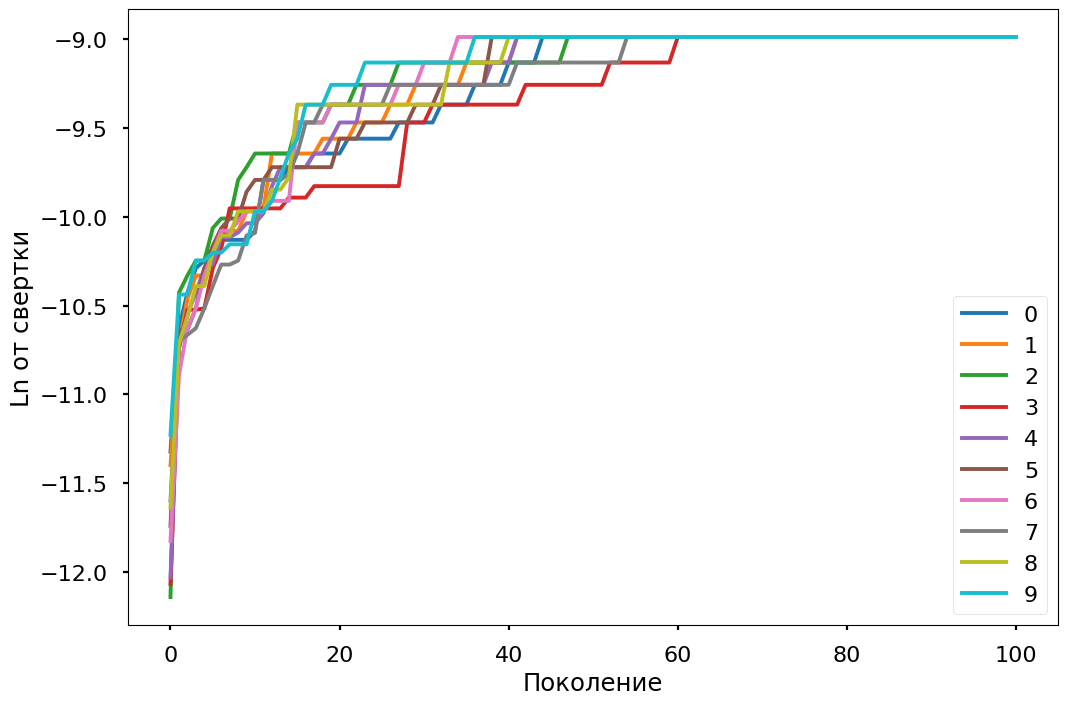

In [19]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')


plt.figure(figsize = (12, 8))
for exp in range(len(experements)):
  plt.plot([i for i in range(len(experements[exp]))], np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))]), label = str(exp))

plt.xlabel('Поколение')
plt.ylabel('Ln от свертки')
plt.legend()
plt.show()

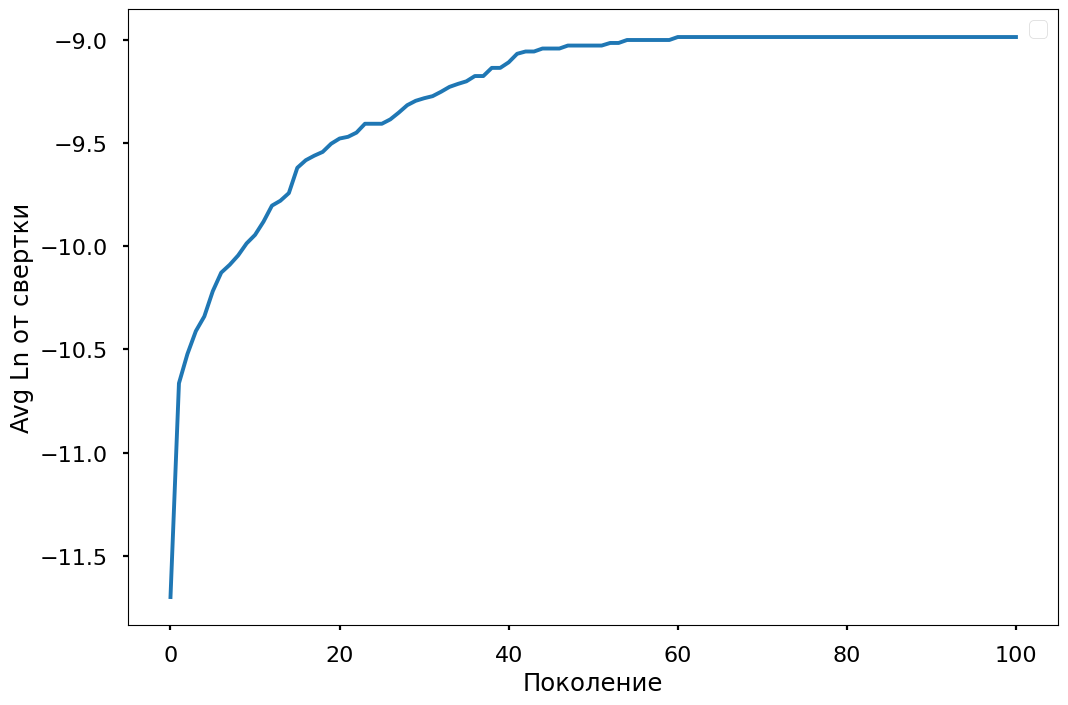

In [20]:
plt.figure(figsize = (12, 8))
y = np.zeros(len(experements[exp]))
for exp in range(len(experements)):
  y += np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))])

plt.plot([i for i in range(len(experements[exp]))], y/10)

plt.xlabel('Поколение')
plt.ylabel('Avg Ln от свертки')
plt.legend()
plt.show()

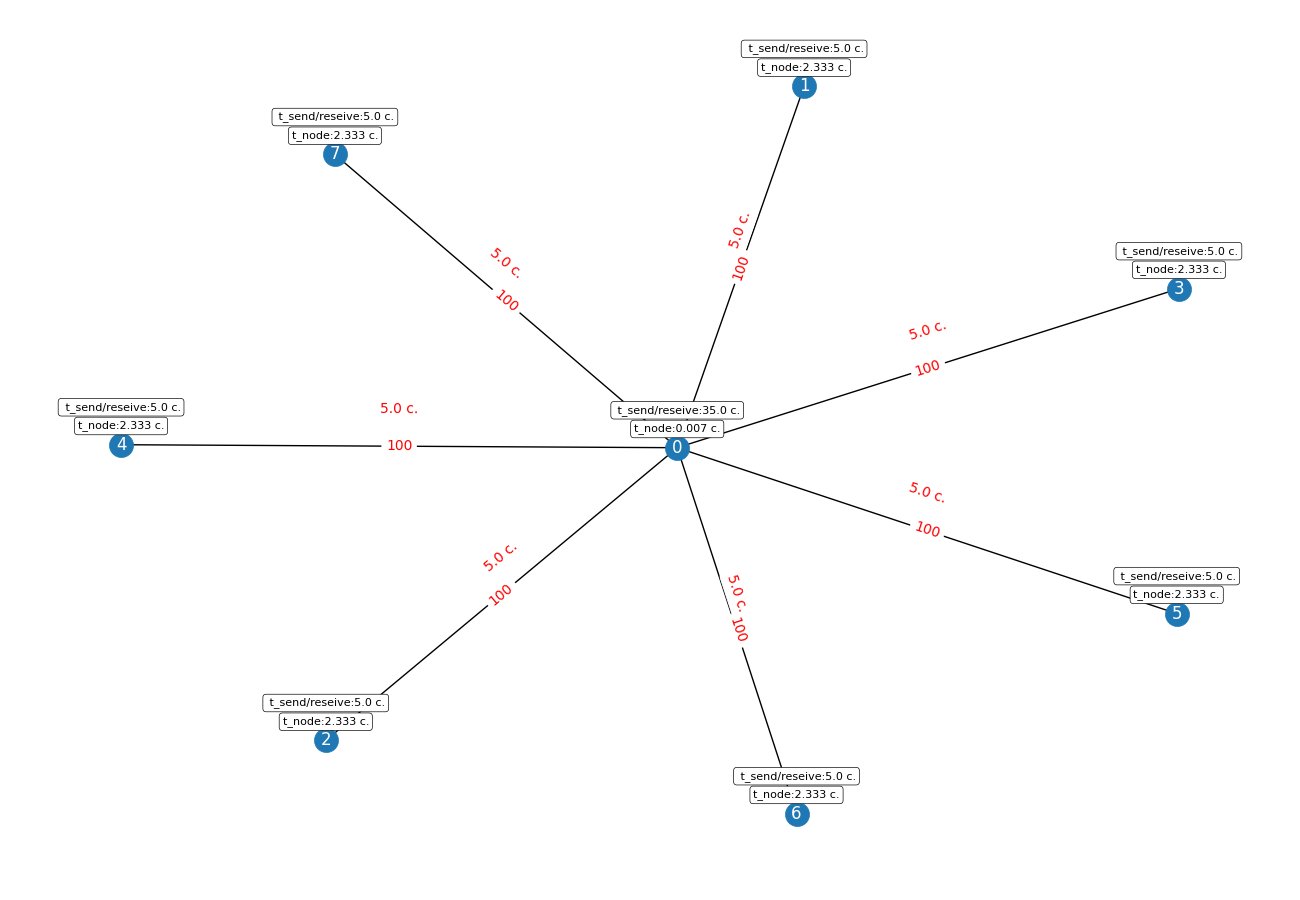

In [21]:
experements[0][-1][-1].draw_result()

In [22]:
print(experements[0][-1][-1])

Cвертка: 0.0001249437293293903,
Временя выполнение задачи (с): 121.34,
Хромосома: [6 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 0], '30': [3, 0], '40': [4, 0], '50': [5, 0], '60': [6, 0], '70': [7, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 100, '02': 100, '03': 100, '04': 100, '05': 100, '06': 100, '07': 100}
v_reseive_to_node: [700, 0, 0, 0, 0, 0, 0, 0]
v_sent_to_node: [0, 100, 100, 100, 100, 100, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
t_edges: [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:8003.6029448399995
Ограничения
1




In [23]:
CRITERIA = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Временя выполнение задачи (с)' :[f1, 'min', {'index_node':[i for i in range(net.number)],}],
        # 'Энергопотребление (МВт)' : [f2, 'min', {'index_node':[i for i in range(net.number)]}],
        'Объемы передаваемой информации' : [f3, 'min', {'index_node':[i for i in range(net.number)]}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
        #'Нагрузка':{
        #    'index_node': [i for i in range(net.number)],
        #    'f': [f4, 'min', {}]
        #},
        #'Объемы передаваемой информации': {
        #    'index_node': [i for i in range(net.number)],
        #    'f':[f5, 'min', {}]
        #},
    }
}
LIMITATIONS = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Ограничение по времени' :[f1, {'index_node':[i for i in range(net.number)], 'T_lim': 77}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
    }

}

In [24]:
Solution._NET = net
Solution._TASK = task
Solution._CRITERIA = CRITERIA
Solution._LIMITATIONS = LIMITATIONS

In [25]:
experements = []
arr_algo = []

for i in range(10):
    RANDOM_SEED = i
    random.seed(RANDOM_SEED)
    np.random.seed(RANDOM_SEED)
    algo = GA(100, 0.9, 0.1, 100)
    algo.optimize()
    arr_algo.append(algo)
    experements.append(algo.HISTORY)
    algo.print_res()
    print()

Cвертка: 0.0001249437293293903,
Временя выполнение задачи (с): 121.34,
Хромосома: [6 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 0], '30': [3, 0], '40': [4, 0], '50': [5, 0], '60': [6, 0], '70': [7, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 100, '02': 100, '03': 100, '04': 100, '05': 100, '06': 100, '07': 100}
v_reseive_to_node: [700, 0, 0, 0, 0, 0, 0, 0]
v_sent_to_node: [0, 100, 100, 100, 100, 100, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
t_edges: [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:8003.6029448399995
Ограничения
1



Cвертка: 0.0001249437293293903,
Временя выполнение задачи (с)

<ipython-input-26-3d584a83d833>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


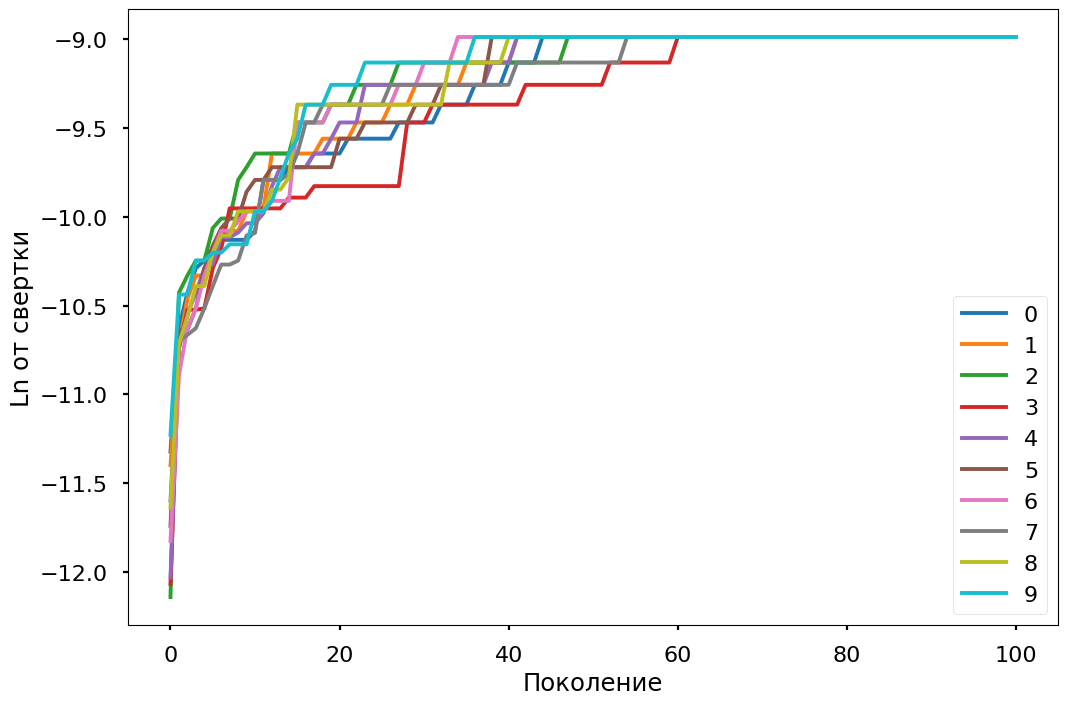

In [26]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')


plt.figure(figsize = (12, 8))
for exp in range(len(experements)):
  plt.plot([i for i in range(len(experements[exp]))], np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))]), label = str(exp))

plt.xlabel('Поколение')
plt.ylabel('Ln от свертки')
plt.legend()
plt.show()

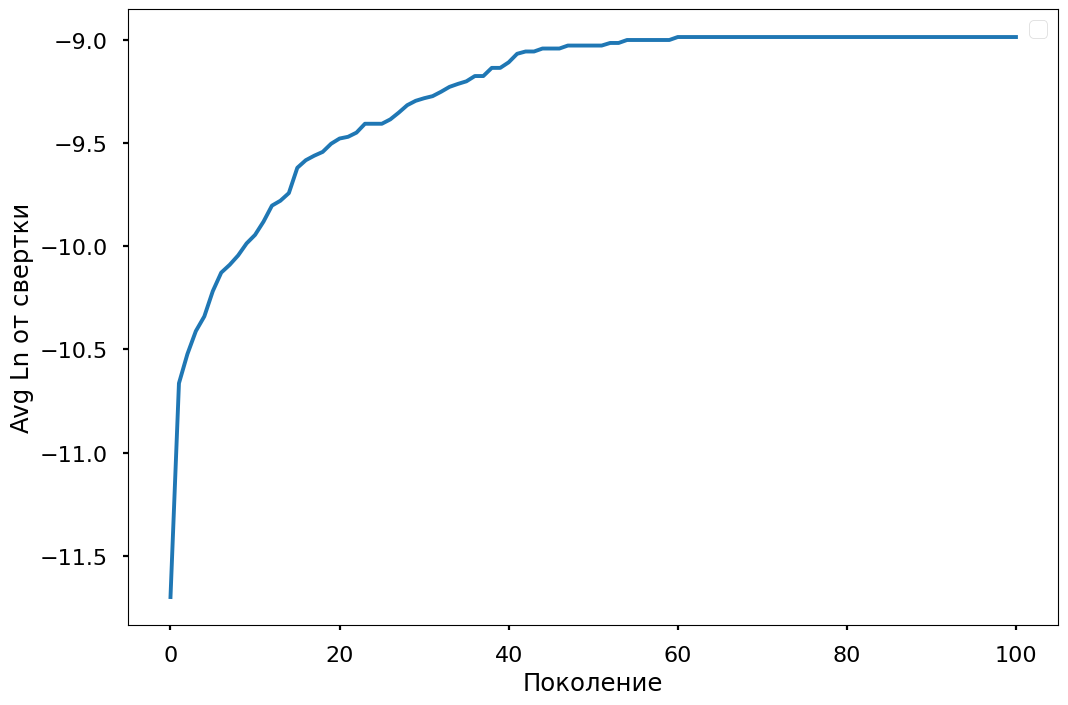

In [27]:
plt.figure(figsize = (12, 8))
y = np.zeros(len(experements[exp]))
for exp in range(len(experements)):
  y += np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))])

plt.plot([i for i in range(len(experements[exp]))], y/10)

plt.xlabel('Поколение')
plt.ylabel('Avg Ln от свертки')
plt.legend()
plt.show()

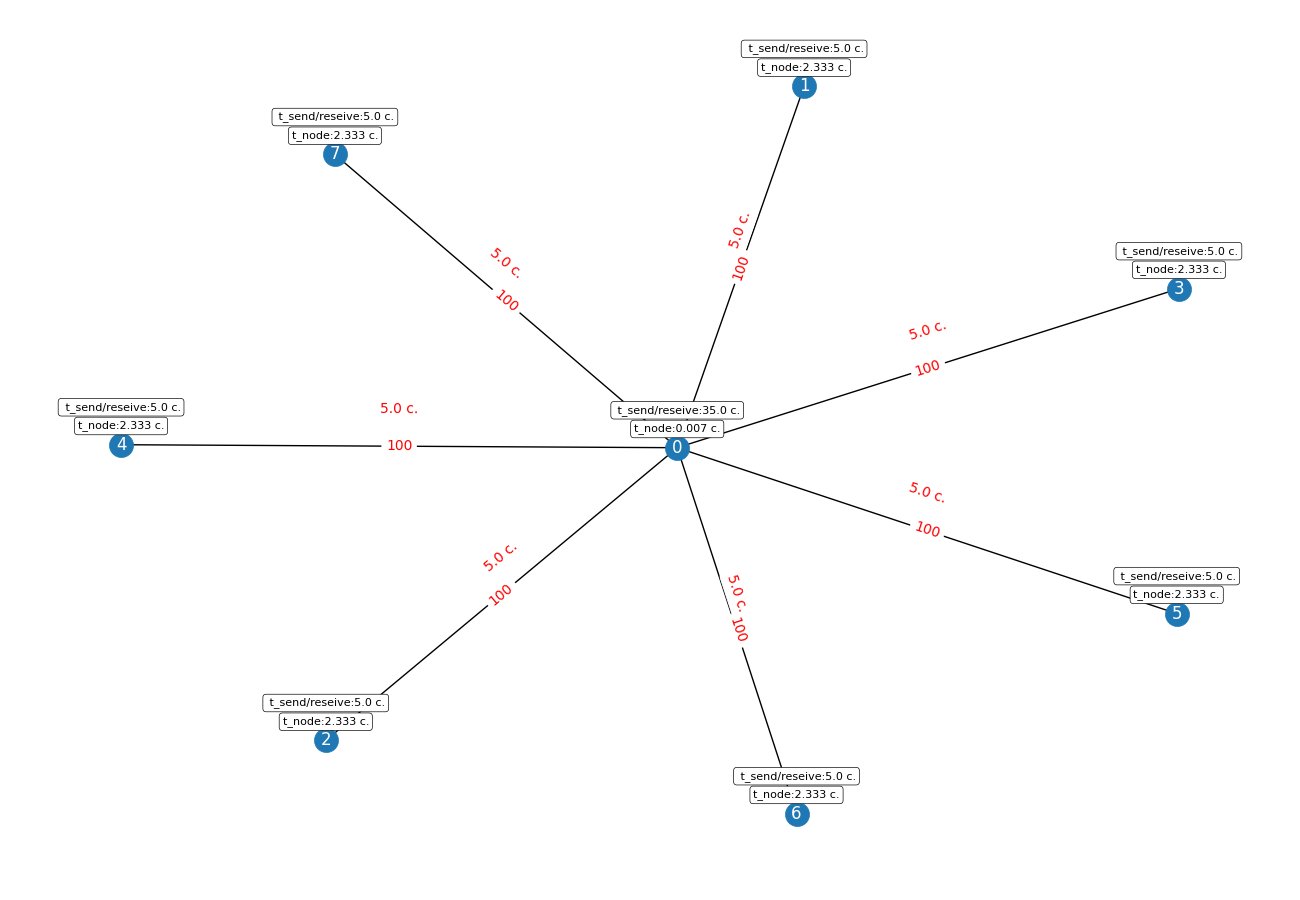

In [28]:
experements[0][-1][-1].draw_result()

In [29]:
print(experements[0][-1][-1])

Cвертка: 0.0001249437293293903,
Временя выполнение задачи (с): 121.34,
Хромосома: [6 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 0], '30': [3, 0], '40': [4, 0], '50': [5, 0], '60': [6, 0], '70': [7, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 100, '02': 100, '03': 100, '04': 100, '05': 100, '06': 100, '07': 100}
v_reseive_to_node: [700, 0, 0, 0, 0, 0, 0, 0]
v_sent_to_node: [0, 100, 100, 100, 100, 100, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
t_edges: [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:8003.6029448399995
Ограничения
1




In [30]:
CRITERIA = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Временя выполнение задачи (с)' :[f1, 'min', {'index_node':[i for i in range(net.number)],}],
        'Энергопотребление (МВт)' : [f2, 'min', {'index_node':[i for i in range(net.number)]}],
        'Объемы передаваемой информации' : [f3, 'min', {'index_node':[i for i in range(net.number)]}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
        #'Нагрузка':{
        #    'index_node': [i for i in range(net.number)],
        #    'f': [f4, 'min', {}]
        #},
        #'Объемы передаваемой информации': {
        #    'index_node': [i for i in range(net.number)],
        #    'f':[f5, 'min', {}]
        #},
    }
}
LIMITATIONS = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Ограничение по времени' :[f1, {'index_node':[i for i in range(net.number)], 'T_lim': 77}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
    }

}

In [31]:
Solution._NET = net
Solution._TASK = task
Solution._CRITERIA = CRITERIA
Solution._LIMITATIONS = LIMITATIONS

In [32]:
experements = []
arr_algo = []

for i in range(10):
    RANDOM_SEED = i
    random.seed(RANDOM_SEED)
    np.random.seed(RANDOM_SEED)
    algo = GA(100, 0.9, 0.1, 100)
    algo.optimize()
    arr_algo.append(algo)
    experements.append(algo.HISTORY)
    algo.print_res()
    print()

Cвертка: 1.7849104189912902e-07,
Временя выполнение задачи (с): 121.34,
Хромосома: [6 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 0], '30': [3, 0], '40': [4, 0], '50': [5, 0], '60': [6, 0], '70': [7, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 100, '02': 100, '03': 100, '04': 100, '05': 100, '06': 100, '07': 100}
v_reseive_to_node: [700, 0, 0, 0, 0, 0, 0, 0]
v_sent_to_node: [0, 100, 100, 100, 100, 100, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
t_edges: [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:8003.6029448399995
Объемы передаваемой информации / min:700
Ограничения
1



Cвертка: 1.78491041

<ipython-input-33-3d584a83d833>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


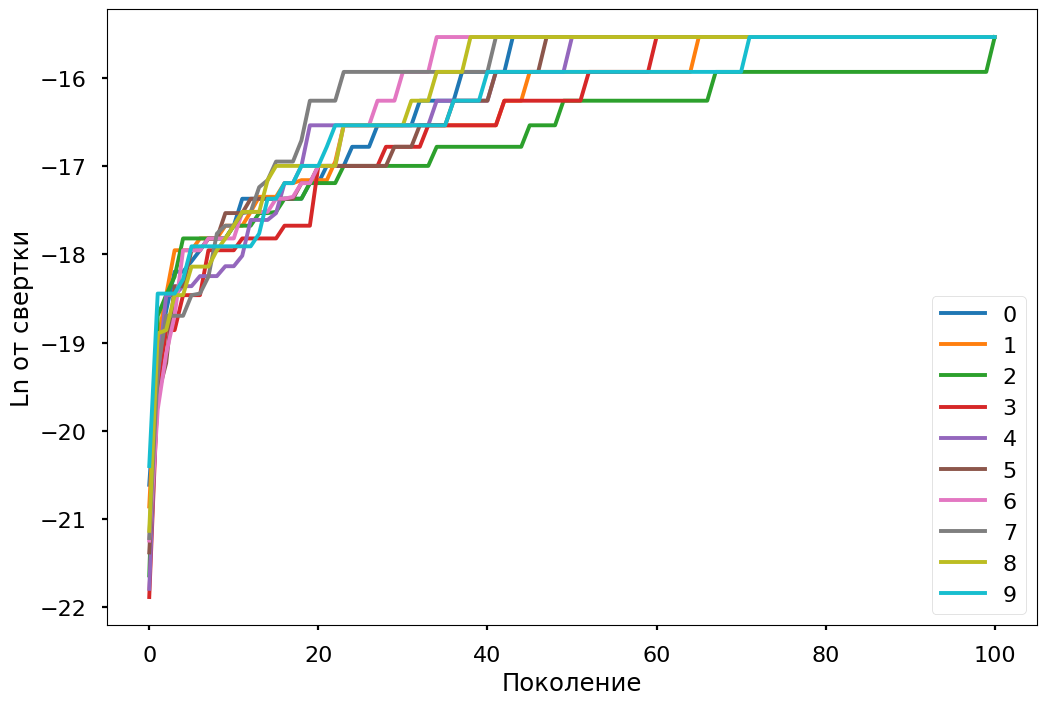

In [33]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')


plt.figure(figsize = (12, 8))
for exp in range(len(experements)):
  plt.plot([i for i in range(len(experements[exp]))], np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))]), label = str(exp))

plt.xlabel('Поколение')
plt.ylabel('Ln от свертки')
plt.legend()
plt.show()

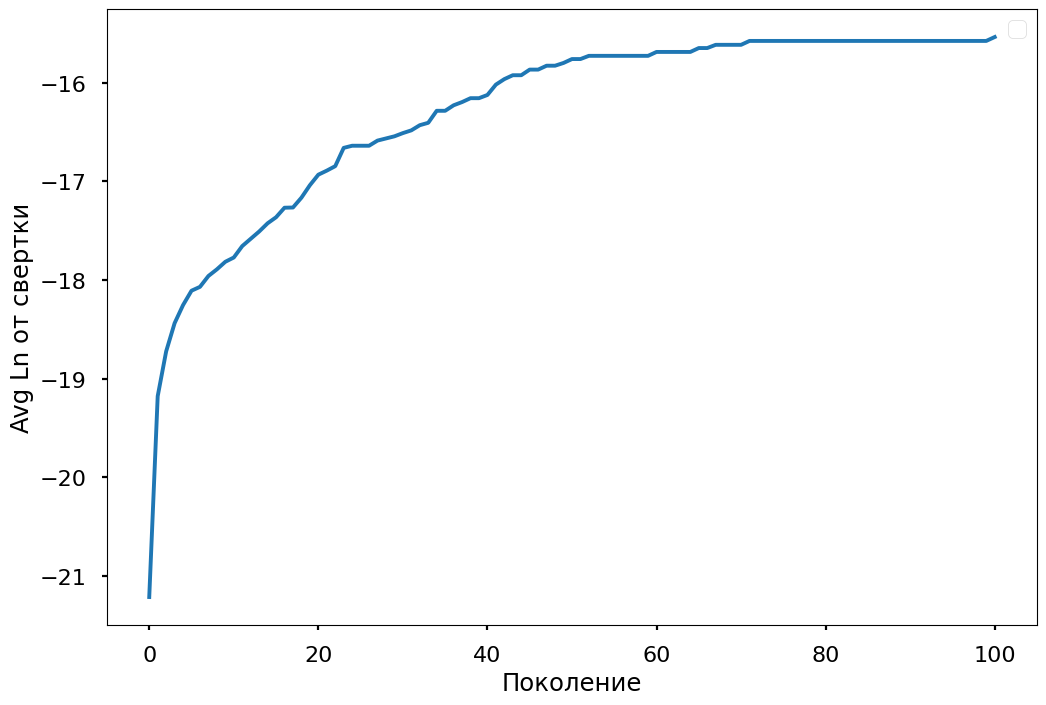

In [34]:
plt.figure(figsize = (12, 8))
y = np.zeros(len(experements[exp]))
for exp in range(len(experements)):
  y += np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))])

plt.plot([i for i in range(len(experements[exp]))], y/10)

plt.xlabel('Поколение')
plt.ylabel('Avg Ln от свертки')
plt.legend()
plt.show()

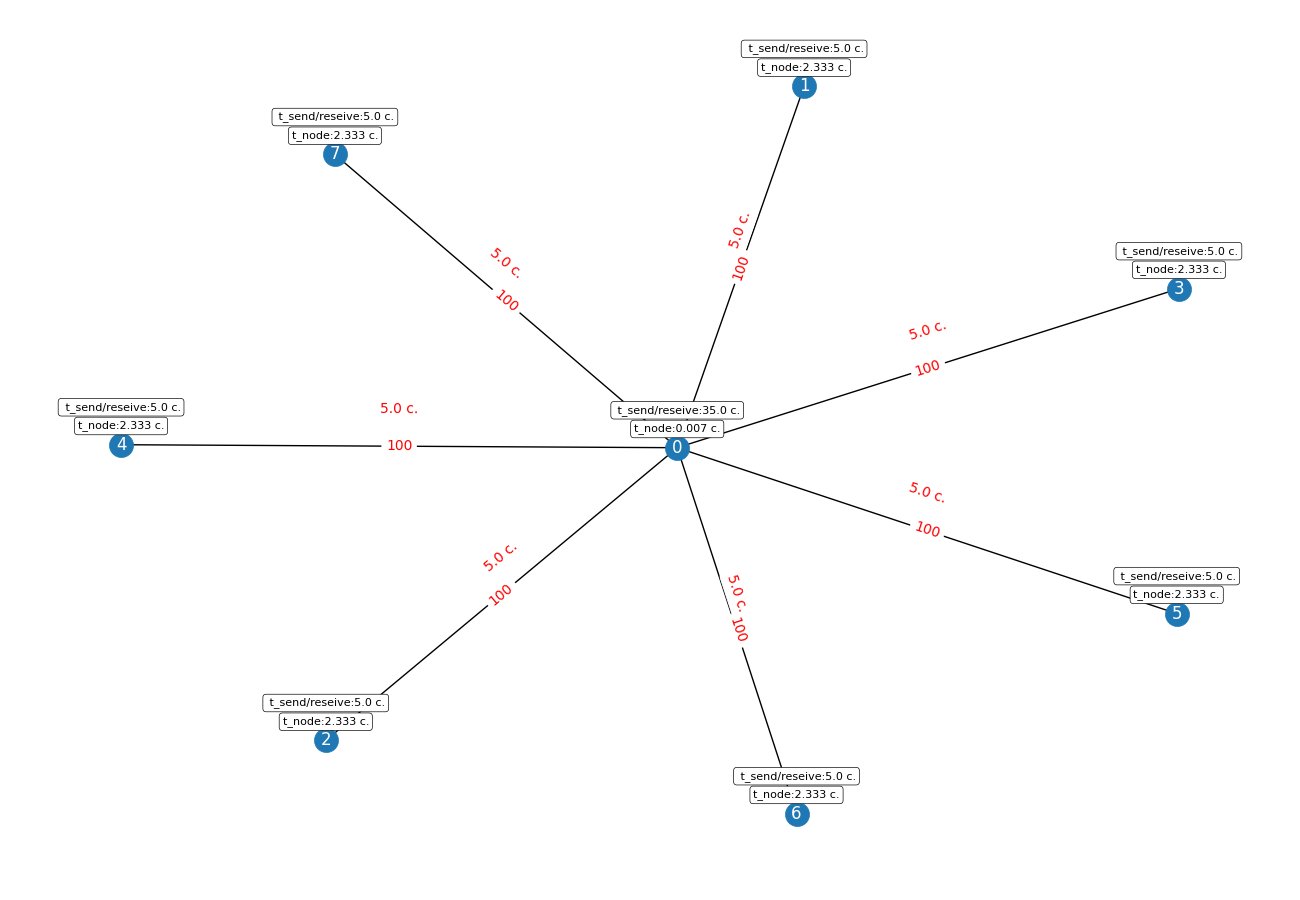

In [35]:
experements[0][-1][-1].draw_result()

In [36]:
print(experements[0][-1][-1])

Cвертка: 1.7849104189912902e-07,
Временя выполнение задачи (с): 121.34,
Хромосома: [6 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 0], '30': [3, 0], '40': [4, 0], '50': [5, 0], '60': [6, 0], '70': [7, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 100, '02': 100, '03': 100, '04': 100, '05': 100, '06': 100, '07': 100}
v_reseive_to_node: [700, 0, 0, 0, 0, 0, 0, 0]
v_sent_to_node: [0, 100, 100, 100, 100, 100, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
t_edges: [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:8003.6029448399995
Объемы передаваемой информации / min:700
Ограничения
1


